In [1]:
from mplsoccer.pitch import VerticalPitch
from mplsoccer.dimensions import create_pitch_dims
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os
plt.style.use('ggplot')
%config InlineBackend.figure_format='retina'

In [2]:
def calculate_visible(x, y, dim):
    d1 = max(abs(dim.goal_bottom - y), abs(dim.goal_top - y))
    d2 = abs(dim.right - x)
    d3 = abs(dim.center_width - y)
    angle_start = math.degrees(math.atan2(d2, d1))
    goal_width = dim.goal_width
    angle_deg = math.atan2(goal_width * d2 , (d2**2 + d3**2 - (goal_width / 2.) ** 2))
    if angle_deg < 0:
        angle_deg = math.pi + angle_deg
    angle_deg = round(math.degrees(angle_deg), 1)
    angle_start = round(angle_start, 1)
    
    return angle_start, angle_deg

In [3]:
x, y = (100, 30)
x1, y1 = (108, 50)

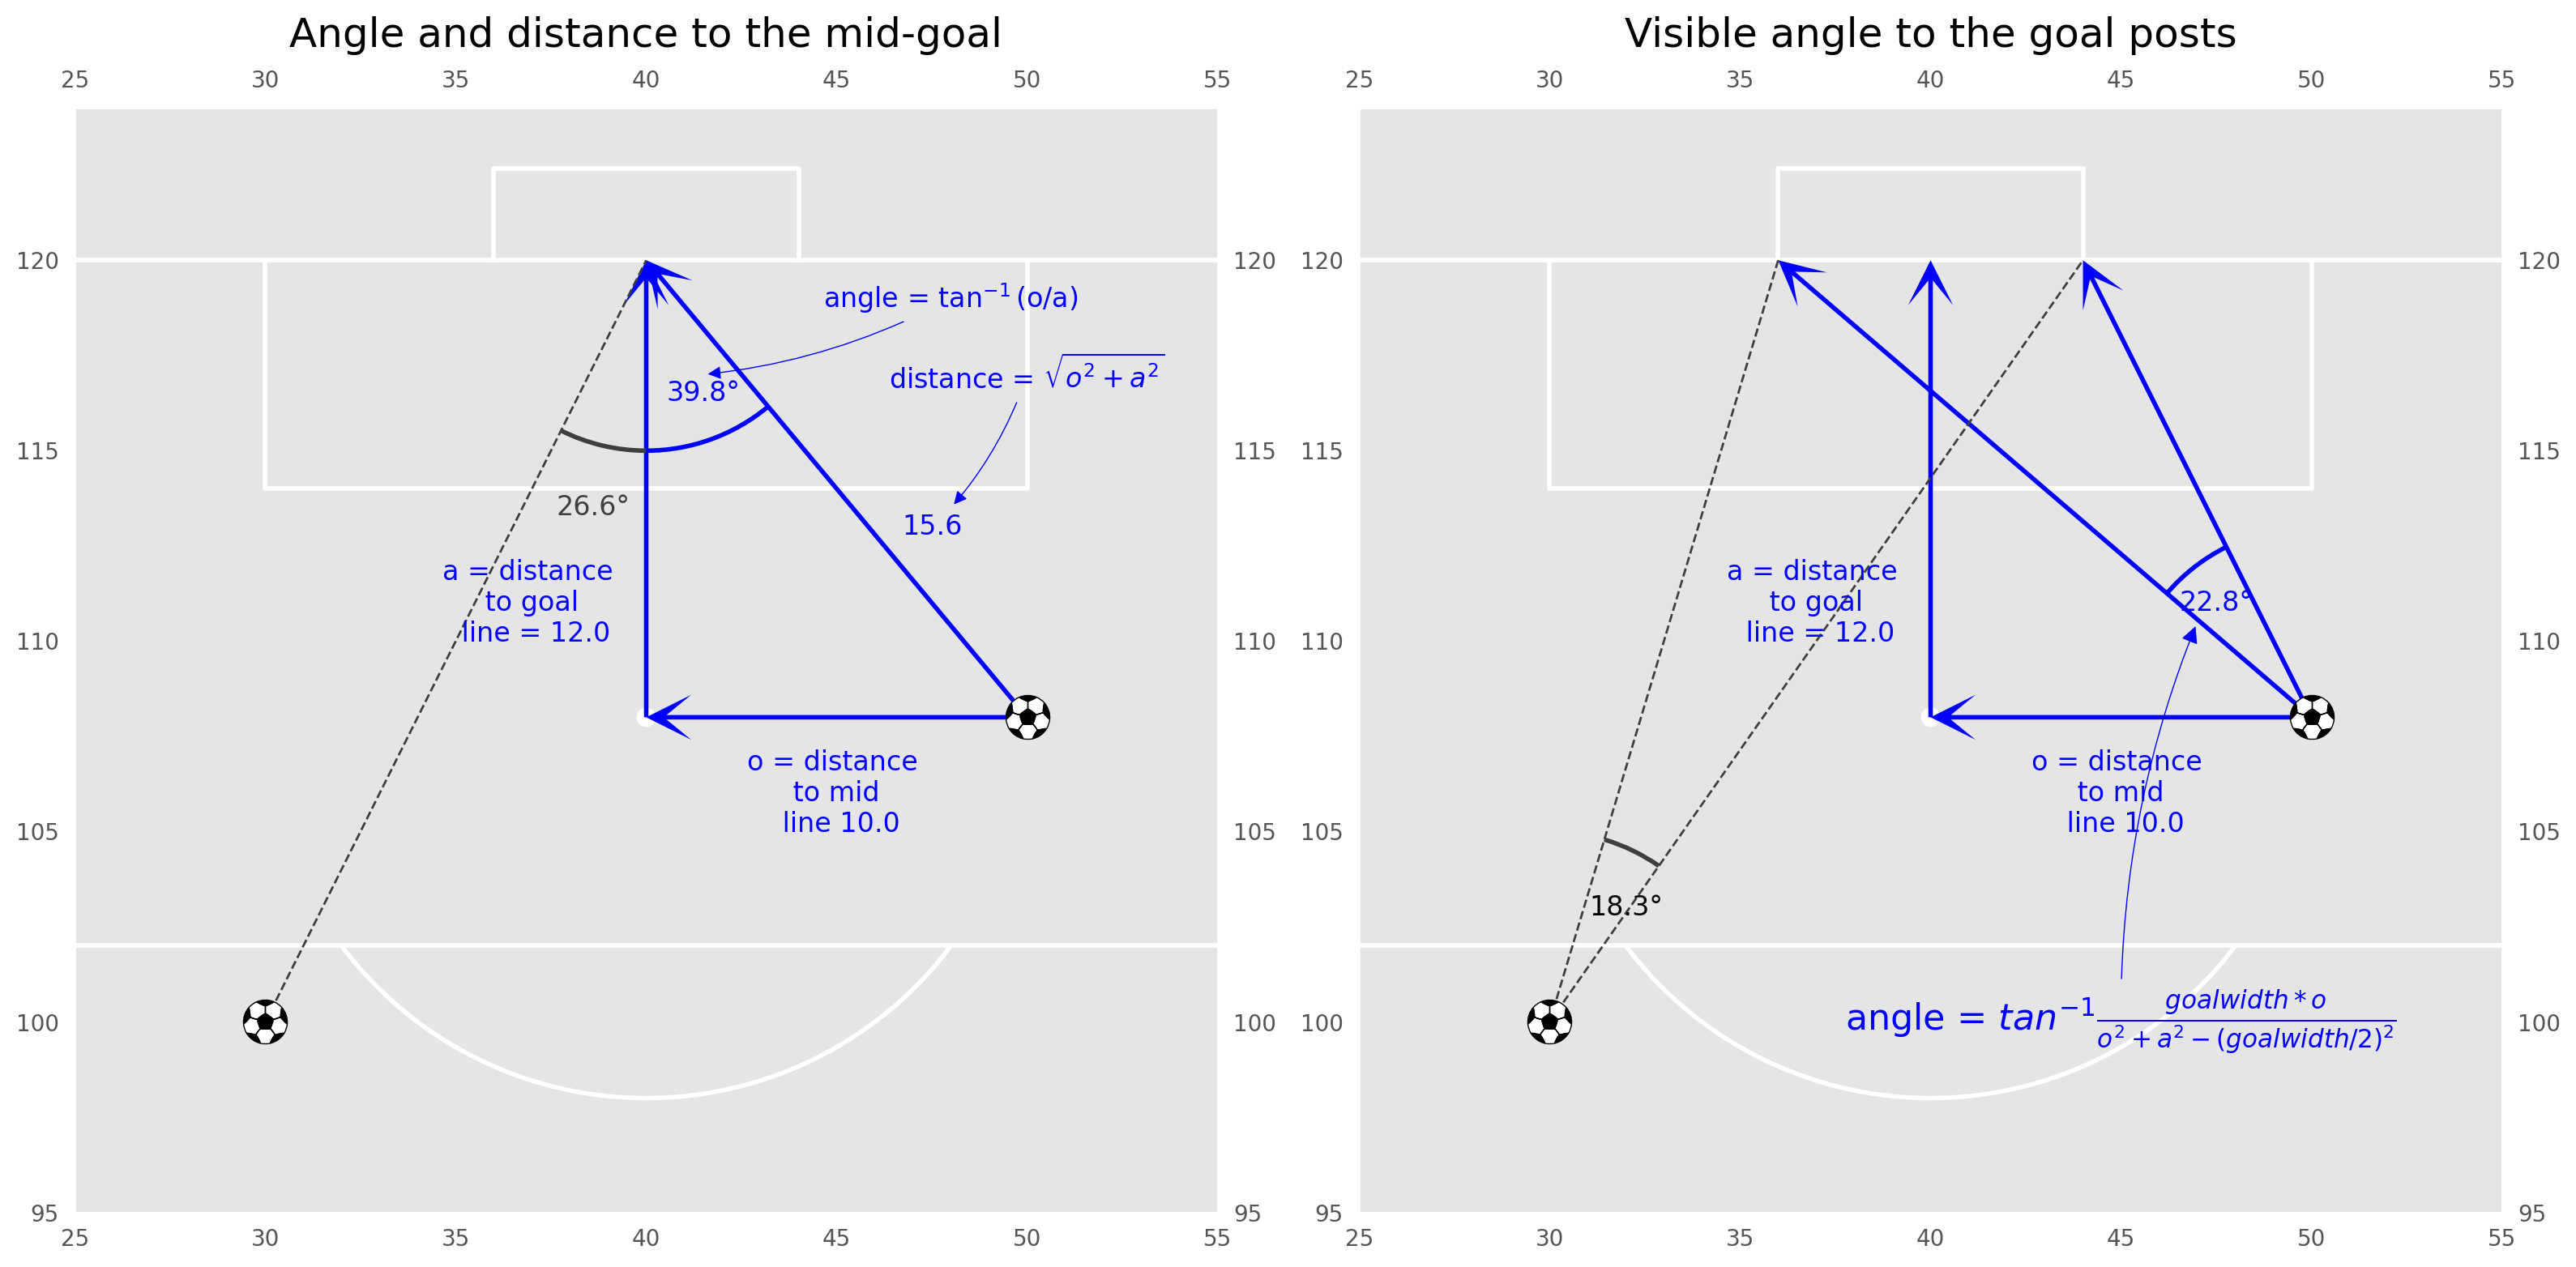

In [4]:
pitch = VerticalPitch(half=True, pad_left=-25, pad_right=-25, pad_bottom=-35,
                      label=True, axis=True, goal_type='box')
fig, axes = pitch.draw(ncols=2, figsize=(16, 9))

dim = create_pitch_dims(pitch_type='statsbomb')
mid_goal_y = dim.center_width
arrowstyle = dict(arrowstyle="-|>", connectionstyle="arc3,rad=-0.1", ec="blue", fc='blue')

for ax in axes:
    pitch.scatter([x, x1], [y, y1], ax=ax, s=400, marker='football', zorder=2)
    pitch.annotate(f'o = distance \n to mid \n line {abs(mid_goal_y - y1)}',
                   (106, 45), ax=ax, fontsize=12, color='blue', ha='center', va='center')
    pitch.annotate(f'a = distance \n to goal \n line = {abs(dim.right - x1)}',
                   (111, 37), ax=ax, fontsize=12, color='blue', ha='center', va='center')

# first angle
pitch.lines(x, y, dim.right, mid_goal_y,
            lw=1, color='#3F3F3F', ax=axes[0], zorder=1.5, linestyle='--')
mid_angle1 = round(math.degrees(math.atan2(abs(mid_goal_y - y), abs(dim.right - x))), 1)
arc3 = patches.Arc((mid_goal_y, dim.right), 10, 10, angle=270, theta1=-mid_angle1, theta2=0,
                  ec='#3F3F3F', linewidth=2, fill=False, zorder=2)
axes[0].add_patch(arc3)
pitch.annotate(f'{mid_angle1}°',(113.5, 38.6), ax=axes[0], fontsize=12, color='#3F3F3F', ha='center', va='center')
mid_angle2 = round(math.degrees(math.atan2(abs(mid_goal_y - y1), abs(dim.right - x1))), 1)
distance2 = round((abs(mid_goal_y - y1)**2 + abs(dim.right - x1)**2)**0.5, 1)
arc4 = patches.Arc((mid_goal_y, dim.right), 10, 10, angle=270, theta1=0, theta2=mid_angle2,
                  ec='blue', linewidth=2, fill=False, zorder=2)
axes[0].add_patch(arc4)
pitch.annotate(f'{mid_angle2}°',(116.5, 41.5), ax=axes[0], fontsize=12, color='blue', ha='center', va='center')
pitch.arrows([x1, x1, x1], [y1, y1, mid_goal_y], [dim.right, x1, dim.right], [mid_goal_y, mid_goal_y, mid_goal_y],
             width=2, color='blue', ax=axes[0], headlength=10, headwidth=10)
pitch.annotate(distance2, (113, 47.5), ax=axes[0], fontsize=12, color='blue', ha='center', va='center')
pitch.annotate(r'angle = $\tan^{-1}$(o/a)', xy=(117, 41.5), xytext=(119, 48),
               arrowprops=arrowstyle, ax=axes[0], fontsize=12, color='blue', ha='center', va='center')
distance_annotation = r'distance = $\sqrt{o^\mathsf{2} + a^\mathsf{2}}$'
pitch.annotate(distance_annotation, xy=(113.5, 48), xytext=(117, 50),
               arrowprops=arrowstyle, ax=axes[0], fontsize=12, color='blue', ha='center', va='center')
axes[0].set_title('Angle and distance to the mid-goal', fontsize=18, pad=10)

# second angle
pitch.lines([x, x], [y, y], [dim.right, dim.right], [dim.goal_bottom, dim.goal_top],
            lw=1, ax=axes[1], color='#3F3F3F', zorder=1.5, linestyle='--')

pitch.arrows([x1, x1], [y1, y1], [dim.right, dim.right], [dim.goal_bottom, dim.goal_top], ax=axes[1],
             width=2, color='blue', headlength=10, headwidth=10)
angle_start1, angle_deg1 = calculate_visible(x, y, dim)
arc1 = patches.Arc((y, x), 10, 10, angle=0, theta1=angle_start1, theta2=angle_start1 + angle_deg1,
                   ec='#3F3F3F', linewidth=2, fill=False, zorder=2)
axes[1].add_patch(arc1)
pitch.annotate(f'{angle_deg1}°',(x+3, y+2), ax=axes[1], fontsize=12, ha='center', va='center')

angle_start2, angle_deg2 = calculate_visible(x1, y1, dim)
arc2 = patches.Arc((y1, x1), 10, 10, angle=0, theta1= 180 - angle_deg2 - angle_start2,
                   theta2= 180 - angle_start2, ec='blue', linewidth=2, fill=False, zorder=2)
axes[1].add_patch(arc2)
pitch.annotate(f'{angle_deg2}°',(x1+3, y1-2.5), ax=axes[1], fontsize=12, color='blue', ha='center', va='center')
pitch.arrows([x1, x1], [y1, mid_goal_y], [x1, dim.right], [mid_goal_y, mid_goal_y],
             width=2, color='blue', ax=axes[1], headlength=10, headwidth=10)
angle_annotation = r'angle = $tan^{-1}\frac{goal width * o}{o^2 + a^2 - (goal width/2)^2}$'
pitch.annotate(angle_annotation, xy=(110.5, 47), xytext=(100, 45),
               arrowprops=arrowstyle, ax=axes[1], fontsize=16, color='blue', ha='center', va='center')

axes[1].set_title('Visible angle to the goal posts', fontsize=18, pad=10)

fig.savefig(os.path.join('..', 'figures', '03_angle_and_distance.png'), bbox_inches = 'tight', pad_inches = 0.1)